# Загрузка библиотек

In [ ]:
#установка bigartm
!apt-get install git
!git clone --branch stable https://github.com/bigartm/bigartm.git
!apt-get install cmake
!apt-get install g++
!pip install protobuf
!pip install pandas
!pip install numpy
!pip install wheel
!pip install cython
!pip install pybind11
!apt-get install -y --no-install-recommends g++-9
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-9 100
!cd bigartm && mkdir build
!cd bigartm/build && cmake .. && make
!cd bigartm/python && python setup.py bdist_wheel --universal
!pip install bigartm/python/dist/bigartm-*.whl

In [ ]:
# лемматизация
!pip install pymystem3

# Обработка текста

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Изучим данные

In [ ]:
df = pd.read_excel('/content/drive/My Drive/topics/base_of_messages.xlsx')
df.head()

,№,Дата,Тип,Заголовок,Сообщение,Автораспознанный текст,Площадка,Тип площадки,Ссылка,Автор,...,Спам,Объявления,Категории,Токсичность,Статус на площадке,Обработано,Избранное,Примечание,Мнения,Объекты
0,1,18.04.2024 12:28,Пост,NaN,"Перевалили за медиану весны, а значит, наш июн...",Тексты с изображений _x000D_\n29.06 beer солов...,ВКонтакте,Соцсеть,http://vk.com/wall-183129547_713,Lobotomy Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,18.04.2024 12:25,Пост,NaN,Новый гостевой сорт - Капитан Пшеничное🦜\n⠀\nА...,Тексты с изображений _x000D_\n4.3% 12 капитан ...,ВКонтакте,Соцсеть,http://vk.com/wall-128033962_8170,ПИФКО. Свежее небутылочное пиво,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,18.04.2024 11:00,Пост,NaN,Все мы много раз видели картонные подставки по...,Тексты с изображений _x000D_\nuntv face ye неф...,ВКонтакте,Соцсеть,http://vk.com/wall-66338927_165,"У Андреевича (пакеты с логотипом, СПб)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,18.04.2024 08:11,Пост,NaN,Пивоварня [club68557855|Paradox] родом из Санк...,Тексты с изображений _x000D_\nдавай? dban para...,ВКонтакте,Соцсеть,http://vk.com/wall-116257751_1711,ДАВАЙ ДВА,...,NaN,NaN,NaN,NaN,Отредактировано,NaN,NaN,NaN,NaN,NaN
4,5,18.04.2024 07:43,Пост,NaN,Производители Nokia и пива Heineken создали «с...,NaN,ВКонтакте,Соцсеть,http://vk.com/wall557921016_2592,Николай Малышев,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалим повторяющиеся сообщения. В противном случае большое количество одинаковых текстов могут ошибочно выродиться в отдельную тему

In [ ]:
print(f"Общее количество сообщений: {len(df['Сообщение'])}")
print(f"Общее количество непустых сообщений: {len(df['Сообщение'].dropna())}")
print(f"Количество уникальных сообщений: {len(df['Сообщение'].unique())}")

texts = df['Сообщение'].unique()

Общее количество сообщений: 4859
Общее количество непустых сообщений: 4859
Количество уникальных сообщений: 4639


Посмотрим на облако слов, чтобы примерно оценить наш набор документов

In [ ]:
def wordcloud(text:str) -> None:
  """
  Построение облака слов

  Args:
    text (str): объединенный набор всех слов в тексте

  Returns:
    None
  """
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

merged_text = ' '.join(texts)
merged_text = merged_text.lower()

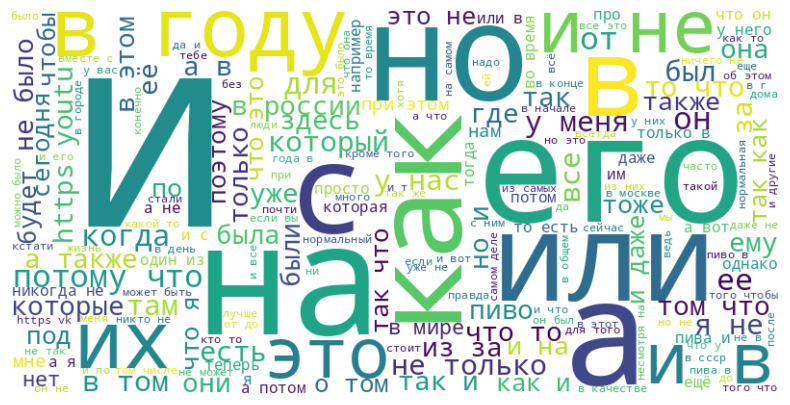

In [ ]:
wordcloud(merged_text)

NLTK (Natural Language Toolkit) – специальная библиотека для работы с обработкой естественного языка. С ее помощью можно анализировать тексты на русском, английском, немецком и других языках.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('russian') # создание стоп-слов на русском из nltk
# добавим дополнительно стоп-слова, которых нет в словаре
words_to_append = ['это', 'так', 'его', 'же', 'наш', 'ваш', 'такой', 'свой', 'который', 'то', 'что', 'эта', 'также', 'кто-то', 'что-то', 'где-то', 'из-за', 'как-то', 'её', 'какой-то', 'г', 'гг', 'го', 'оно', 'просто', 'например', 'пока', 'сразу', 'the', 'поэтому', 'почему', 'немного', 'большой', 'второй', 'первый', 'оказываться', 'любой', 'несколько', 'самый', 'очень', 'разный', 'каждый', 'хотя', 'мочь', 'кстати', 'сюда', 'весь', 'лишь', 'кроме']
stop_words = stop_words + words_to_append
print(stop_words)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocessing(documents: list[str], stopwords: list[str], tokenizer) -> list[str]:
  """

  Предобработка текста перед тематическим моделированием

  Args:
    documents (list[str]): список документов
    stopwords (list[str]): список стоп-слов
    tokenizer: способ разделения предложений на токены
    threshold_common_words (float): пороговое значение для удаления наименее встречающихся слов

  Returns:
    list[str]: список предобработанных документов

  """

  # токенизация + удаление стоп-слов + набор всех токенов
  cleaned_documents = []
  tokens = []
  for document in documents:
    cleaned_doc = []
    tokenized = tokenizer.tokenize(document)
    for token in tokenized:
      token = token.lower()
      # оставим только символы текста (рус-англ), длина которых не меньше 2 (для того,
      # чтобы избежать опечаток и случайных символов)
      if (re.match(r'^[a-zа-я]+$', token)) and (token not in stopwords) and (len(token) > 1):
        cleaned_doc.append(token)
        tokens.append(token)
    cleaned_documents.append(cleaned_doc)

  # лемматизация на библиотеке pymystem
  mystem = Mystem()
  lemmatize_docs = []
  for i in range(len(cleaned_documents)):
    mess = ' '.join(cleaned_documents[i])
    lemmatized_words = mystem.lemmatize(mess)
    lemmatized_text = ''.join(lemmatized_words).replace('\n', ' ')
    lemmatize_docs.append(lemmatized_text)

  # очистка самых редко встречающихся слов
  all_words = [word for doc in lemmatize_docs for word in doc.split()]
  fdist = FreqDist(all_words)
  # оставляем 10% самых встречающихся слов (размер выборки остается около 5 тысяч)
  most = fdist.most_common(int(len(set(all_words)) * 0.1))
  most_common_words = {word for word, freq in most}

  docs_with_most_common_words = []
  for document in lemmatize_docs:
      message = [word for word in document.split() if word in most_common_words and word not in stop_words]
      docs_with_most_common_words.append(' '.join(message))

  return docs_with_most_common_words

In [ ]:

import re
from pymystem3 import Mystem
import pymystem3
from nltk.probability import FreqDist
from nltk.tokenize import TweetTokenizer

# получим предобработанный текст
cleaned_text = preprocessing(documents=texts, stopwords=stop_words, tokenizer=TweetTokenizer())

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


Посмотрим на облако слов после обработки

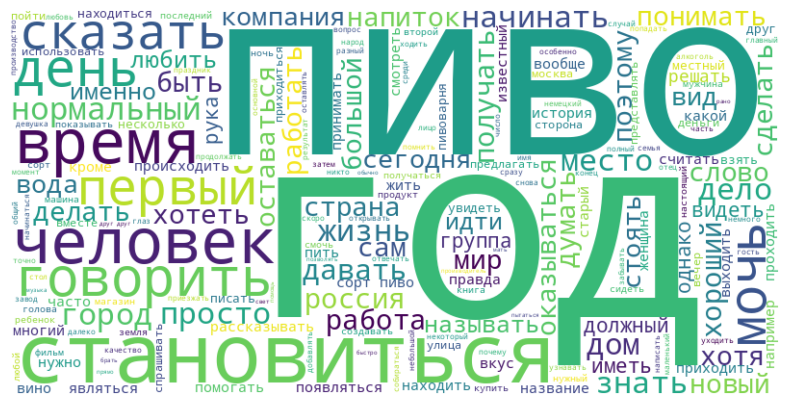

In [ ]:
merged_text = ' '.join(cleaned_text)
wordcloud(merged_text)

# bigARTM

Данные подаются в модель с помощью специального формата: vowpal wabbit:

одноформатный файл,
основанный на следующих принципах:

1. Каждый документ представлен в одной строке
2. Все токены представлены в виде строк (нет необходимости преобразовывать их в целочисленный идентификатор)

С помощью этого формата можно реализовать механизм bigARTM "модальность", указывая автора, дату, и т.д.
В нашей работе мы ограничимся исключительно текстом

In [ ]:
example = "сейчас это предложение будет переведено"

def to_vw_format(document):
    return '|text ' + ''.join(document)

print(to_vw_format(example))

|text сейчас это предложение будет переведено


Следующий шаг: создание словаря и векторизация

Словарь представляет собой набор уникальных слов, встречающихся в коллекции документов. Он используется для построения модели и преобразования текста в числовые векторы.


Batch-векторайзер анализирует каждый документ в коллекции и подсчитывает количество раз, когда каждое слово встречается в документе. Затем количество вхождений слова преобразуется в вероятности с помощью нормализации частот вхождений слов, чтобы получить вероятность в контексте темы. Эти вероятности обновляют матрицу $\Phi$, где каждая строка соответствует теме, а каждый столбец - слову.

In [ ]:
# данные передаются в формате vowpal wabbit
import artm

def bigARTM_preparing (documents: list[str], save_folder_name: str, save_dict_name: str) -> tuple:
  """

  Подготовка данных к обработке bigARTM

  Args:
    documents (list[str]): набор предобработанных документов
    save_folder_name (str): название папки для сохранения файлов
    save_dict_name (str): название файла для сохранения словаря

  Returns:
   tuple: (batch_vectorizer, dictionary)

  """

  # подготовка данных в vowpal wabbit формате
  def to_vw_format(document):
    return '|text ' + ''.join(document)

  with open('/content/drive/My Drive/topics/bigartm_files/corpus_vw.txt', 'w') as f:
      for document in documents:
          vw = to_vw_format(document)
          f.write(str(vw) + '\n')

  # векторизация + создание словаря
  batch_vect = artm.BatchVectorizer(data_path='/content/drive/My Drive/topics/bigartm_files/corpus_vw.txt',
                                        data_format='vowpal_wabbit',
                                        target_folder=f'/content/drive/My Drive/topics/bigartm_files/{save_folder_name}')

  dictionary = artm.Dictionary()
  dictionary.gather(data_path=f'/content/drive/My Drive/topics/bigartm_files/{save_folder_name}')
  dictionary.save_text(dictionary_path=f'/content/drive/My Drive/topics/bigartm_files/{save_folder_name}/{save_dict_name}.txt')

  return (batch_vect, dictionary)



In [ ]:
batch_vect, dictionary = bigARTM_preparing(documents=cleaned_text, save_folder_name='save_folder', save_dict_name='saved_dict')

Регуляризаторы в тематическом моделировании помогают контролировать структуру и разреженность распределений в модели. Давайте подробнее рассмотрим, как работают два регуляризатора, которые мы добавили:

**SmoothSparsePhiRegularizer:**
 - Цель: Разреживание распределений слов в темах.
 - Основная идея: Регуляризатор добавляет штраф (или поощрение) к весам слов в темах, что способствует уменьшению количества слов с ненулевыми весами в каждой теме.
 - Если $\tau < 0$ регуляризатор будет стимулировать разреживание, т.е. уменьшать количество слов с ненулевыми весами в каждой теме. Если $\tau > 0$ регуляризатор будет делать распределение более плотным, т.е. увеличивать количество слов с ненулевыми весами в каждой теме.
 - Эффект: Более разреженные темы легче интерпретировать, так как они содержат меньше слов, и каждое слово более специфично для темы.

**SmoothSparseThetaRegularizer:**
 - Цель: Разреживание распределений тем в документах.
 - Основная идея: Регуляризатор добавляет штраф (или поощрение) к весам тем в документах, что способствует уменьшению количества тем с ненулевыми весами в каждом документе.
 - Влияние $\tau$ аналогично предыдущему регуляризатору
 - Эффект: Более разреженные документы легче интерпретировать, так как они содержат меньше тем, и каждая тема более специфична для документа.




### Выбор числа тем

Для начала мы не знаем, сколько тем содержит наш набор документов. Обучим модель на различных темах и оценим получившиеся метрики.

In [ ]:
metrics = []

for num_top in range(2, 30):
    # инициализация модели
    model = artm.ARTM(num_topics=num_top, dictionary=dictionary, cache_theta=True)

    # метрики для оценки модели
    model.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10)) # сохраним топ-10 ключевых слов
    model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность матрицы слова-темы
    model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) #  разреженность матрицы темы-документы

    # выявление ядра темы (концентрация слов) или ее "разделяемость". Трэшхолд определяет,
    # какая доля общей вероятности слов должна быть покрыта ядром темы.
    model.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3))
    model.scores.add(artm.PerplexityScore(name='PerplexityScore'))

    # Добавляем регуляризаторы
    model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.1))
    model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.1))

    # инициализируем и обучаем модель
    model.initialize(dictionary=dictionary)
    model.fit_offline(batch_vect, num_collection_passes=15)

    # сохраняем значения метрик в словарь
    metrics.append({
        'num_topics': num_top,
        'sparsity_phi': model.score_tracker['SparsityPhiScore'].last_value,
        'sparsity_theta': model.score_tracker['SparsityThetaScore'].last_value,
        'topic_kernel': model.score_tracker['TopicKernelScore'].last_average_contrast,
        'perplexity': model.score_tracker['PerplexityScore'].last_value
    })

df_metrics = pd.DataFrame(metrics)
print(df_metrics)


    num_topics  sparsity_phi  sparsity_theta  topic_kernel   perplexity
0            2      0.113225        0.047101      0.744371  3167.427734
1            3      0.218024        0.130991      0.676385  2795.251709
2            4      0.285896        0.193091      0.636101  2651.651367
3            5      0.341498        0.241388      0.619198  2531.544189
4            6      0.384908        0.273478      0.602911  2433.444580
5            7      0.429632        0.310227      0.598984  2346.640381
6            8      0.460033        0.337734      0.591520  2275.861328
7            9      0.487991        0.364111      0.589861  2222.566162
8           10      0.505876        0.380664      0.581466  2173.426025
9           11      0.528706        0.409199      0.581632  2119.534668
10          12      0.546232        0.426475      0.575758  2081.824219
11          13      0.565653        0.447295      0.576347  2044.702026
12          14      0.574239        0.456764      0.566366  2027

Видно, что с увеличением числа тем показатели разреженности матриц $\Phi$ и $\Theta$ только растут (sparsity_phi, sparsity_theta соответственно). Это логично, ведь мы добавили необходимые для этого регуляризаторы. Кроме того, при увеличении числа топиков, они становятся все более специфичными.

Однако стоит обратить внимание, что topic_kernel ("Разделяемость" тем) ведет себя по-другому: сначала показатель растет, а затем медленно уменьшается. Кроме того, перплексия с ростом числа тем (уже после 5-ой) начинает падать менее значительно.

По совокупности метрик, остановимся на 11 темах, поскольку разреженности матриц достаточно высоки, а разделяемость тем остается хорошей



In [ ]:
optimal_topics = 11

model = artm.ARTM(num_topics=optimal_topics, dictionary=dictionary, cache_theta=True)

# метрики для оценки модели
model.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10))
model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3))
model.scores.add(artm.PerplexityScore(name='PerplexityScore'))

# регуляризаторы
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.1))
model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.1))


model.initialize(dictionary=dictionary)
model.fit_offline(batch_vect, num_collection_passes=15)

### Визуализация результата

In [ ]:
tokens = model.score_tracker["TopTokensScore"].last_tokens
for topic_name in model.topic_names:
    print(topic_name + ': '),
    for word in tokens[topic_name]:
        print(word, end=" ")
    print()

topic_0: 
пиво напиток вино алкоголь пить вода пивной человек водка время 
topic_1: 
год день нормальный песня группа становиться альбом время история александр 
topic_2: 
сказать знать говорить рука жизнь понимать хотеть глаз человек становиться 
topic_3: 
пиво сорт год вкус пивоварня эль город новый завод стиль 
topic_4: 
продукт мясо соль рыба вид жир сахар масло год блюдо 
topic_5: 
год россия страна человек советский русский ссср война мир время 
topic_6: 
человек образ система жизнь год именно мужчина являться общество делать 
topic_7: 
человек день земля дом бог время святой становиться сила имя 
topic_8: 
фильм русский год книга писать ангел художник день иван картина 
topic_9: 
город год место время работать улица друг дом хотеть жить 
topic_10: 
год пиво производитель компания продукция россия производство напиток российский продажа 


In [ ]:
phi = model.get_phi()
theta = model.get_theta()
print(f"Матрица слова-темы: {phi.shape} \nМатрица темы-документы: {theta.shape}")

Матрица слова-темы: (7675, 11) 
Матрица темы-документы: (11, 4639)


По ключевым словам мы уже имеем общее представление о теме. Можем конкретизировать результат, собрав наиболее значимые сообщения из матрицы $\theta$ для каждой темы.

Создадим датасет с текстом, его темой, и вероятностью принадлежности. Это позволит в том числе провести анализ размерности темы

In [ ]:
dataset = pd.DataFrame(columns=['Text', 'Topic', 'Probability'])

for idx in range(len(texts)):
    # распределение тем для текущего документа
    doc_theta = theta.iloc[:, idx]
    # индекс темы с наибольшей вероятностью
    topic_index = doc_theta.idxmax()
    dataset = pd.concat([dataset, pd.DataFrame({'Text': [texts[idx]], 'Topic': [topic_index], 'Probability':[max(doc_theta)]})])

In [ ]:
dataset.reset_index(inplace=True, drop=True)
sorted_dataset = dataset.sort_values(by='Probability', ascending=False)
sorted_dataset.head()

,Text,Topic,Probability
863,"Мелодия дочки...\n– Мам, я все думаю, а почему...",topic_8,1.0
3237,КОММУНИЗМ И ТРУД\n#Экономика@prorivists\nВОПРО...,topic_2,1.0
3224,"4й день был отсыпной, отмывной, отстирочный и ...",topic_3,1.0
853,"Если вы сейчас в Москве, то вам срочно надо по...",topic_10,1.0
1138,"МОСКВА, 15 января. /ТАСС/. Российские производ...",topic_10,1.0


Посмотрим на распределение документов по темам

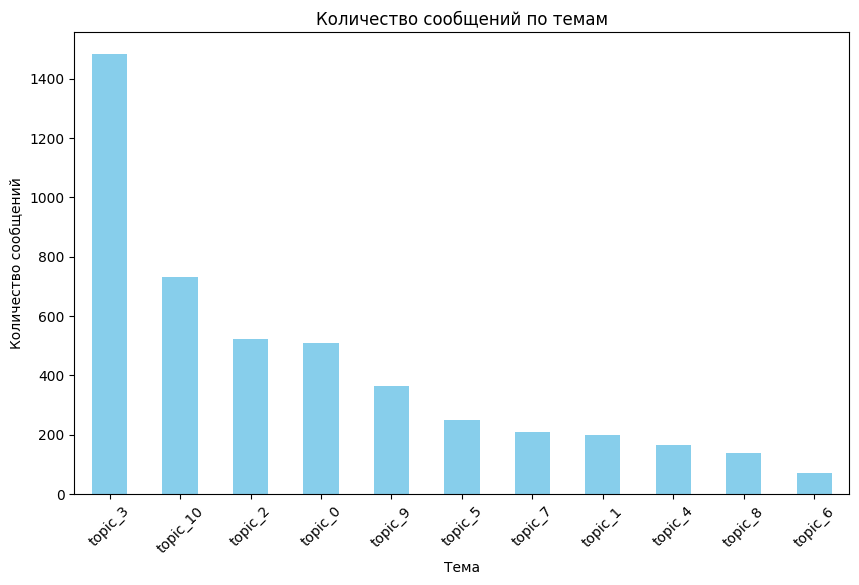

In [ ]:
plt.figure(figsize=(10, 6))
sorted_dataset['Topic'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Количество сообщений по темам')
plt.xlabel('Тема')
plt.ylabel('Количество сообщений')
plt.xticks(rotation=45)
plt.show()

Изучим самые вероятные тексты для случайных топиков

In [ ]:
sorted_dataset[sorted_dataset['Topic'] == 'topic_0'].head(15)

,Text,Topic,Probability
3527,#**Закусить 🍰 торт 🍻 пивом** 🤪 пробовали такое...,topic_0,0.994459
2233,Другое\nВаш любимый сорт пива?\nWheat Ale (Пше...,topic_0,0.948320
3147,"Вчерашняя заметка, сил вечером дописать не был...",topic_0,0.944600
679,Долгожданная новинка в Пифко!\nГостевой сорт 🖤...,topic_0,0.939392
794,Как продавалось разливное пиво во времена сове...,topic_0,0.938446
3089,🍻Доброго дня всем ценителям и любителям пива! ...,topic_0,0.918570
3788,СЕГОДНЯ...\n10 июня - День пивовара в России\n...,topic_0,0.912569
3423,Баночка Franky от пивоварни Selfmade — Triple ...,topic_0,0.902421
1648,"#колонкадиректора\nЧуть больше, чем через год,...",topic_0,0.901039
3621,Очень неприятные новости для всех любителей пи...,topic_0,0.896283


In [ ]:
sorted_dataset[sorted_dataset['Topic'] == 'topic_1'].head(15)

,Text,Topic,Probability
2725,"Ближайшие места\nБлэк Вотер Вилладж\nГород, вы...",topic_1,1.000000
4028,ТурГрад 29.8.18\nhttps://vk.com/wall-69060852_...,topic_1,1.000000
3759,Алкогольный «Мистер сидр» наследил по всей Рос...,topic_1,0.993871
4108,😎Ну вот мы и вернулись из нашего большого путе...,topic_1,0.976693
2571,👯‍♂Чем заняться в Берлине? 👯‍♂\n🔸Советы блогер...,topic_1,0.963412
2554,"Добрый день, добрый день, дорогие любители пив...",topic_1,0.962079
3350,Актерские байки: забавные случаи из жизни Алек...,topic_1,0.961158
339,"Очередь за пивом дружелюбно обсуждает, какой и...",topic_1,0.943747
2476,"Привет , друзья! Мы приготовили для вас красоч...",topic_1,0.931507
4376,Автор: Бикбаев Равиль\nБригада уходит в горы\n...,topic_1,0.875783


In [ ]:
sorted_dataset[sorted_dataset['Topic'] == 'topic_2'].head(15)

,Text,Topic,Probability
3237,КОММУНИЗМ И ТРУД\n#Экономика@prorivists\nВОПРО...,topic_2,1.000000
149,"Солдатская трава, пивная трава и сорняк плотни...",topic_2,1.000000
278,"Cesky Dzbanek\nЧешский джбанек\nПиво светлое, ...",topic_2,1.000000
223,"Вызвал я тут по необходимости ""жену на час"".\n...",topic_2,1.000000
4273,Владелец заведений Grills Seafood Deck и Tiki ...,topic_2,1.000000
3862,"В Ульяновской, Самарской областях и в Удмуртии...",topic_2,1.000000
2841,Пополнили ассортимент ламбиков от бельгийской ...,topic_2,1.000000
2843,Чего только не сочиняли в городе на крови...\n...,topic_2,1.000000
4464,Комитет Госдумы по госстроительству и законода...,topic_2,1.000000
3743,"Уволены высокопоставленные полицейские, дело п...",topic_2,1.000000


In [ ]:
sorted_dataset[sorted_dataset['Topic'] == 'topic_3'].head(15)

,Text,Topic,Probability
3292,7 июля Росалкогольрегулирование провело онлайн...,topic_3,1.000000
240,НОВОСТИ. Пивную банку 1940-х годов продали на ...,topic_3,1.000000
2471,"МАРКИРОВКА ПИВА, СИДРА И ПР.\nС 1 октября прои...",topic_3,1.000000
3757,В ГОСДУМЕ ПРИЗВАЛИ БОРОТЬСЯ С АЛКОГОЛЕМ НА ГОС...,topic_3,1.000000
3706,Обязательная цифровая маркировка медицинских и...,topic_3,1.000000
2608,Раньше всех. Ну почти.\n❗️ Основной производит...,topic_3,1.000000
2606,В российских квасах обнаружили тройное превыше...,topic_3,1.000000
4,Производители Nokia и пива Heineken создали «с...,topic_3,1.000000
2212,«Балтика» подала в суд на Jägermeister с требо...,topic_3,0.998067
1812,Полиция пришла с обысками на завод «Балтика» п...,topic_3,0.988267


In [ ]:
sorted_dataset[sorted_dataset['Topic'] == 'topic_6'].head(15)

,Text,Topic,Probability
373,В Корее становится популярным мороженое от Koz...,topic_6,0.998618
2783,👣Что интересного посмотреть в Калининграде и о...,topic_6,0.998616
4109,😎Ну вот мы и вернулись из нашего большого путе...,topic_6,0.998113
1756,Это любимое летнее блюдо: мы расскажем вам о «...,topic_6,0.998093
3262,"🍽Вечерний фотоанонс под фонтанами Петергофа: ""...",topic_6,0.998091
476,#ОтелиТурции готовятся к сезону 2024! 💫\nНекот...,topic_6,0.997988
4110,"Хотя я слышал, что по статистике молодежь стал...",topic_6,0.776686
4540,Самый важный человек\nНа днях мелькнула новост...,topic_6,0.770159
150,🍺 Ученые создали нейросеть для улучшения вкуса...,topic_6,0.537932
2466,"ПИВНЫЕ ЗАКУСКИ МИРА\nСегодня мы вам расскажем,...",topic_6,0.416804


### Иерархическая модель

При иерархии BigARTM инициализируются корневые темы. При добавлении темы, корпус снова разбивается на темы, а затем для каждой новой подтемы определеяется наиболее близкая корневая тема. Получившиеся подтемы довольно хорошо согласованы друг с другом. Минусы такой обработки - количество корневых тем, количество подтем выбираются заранее. Кроме того, подтема может не подходить ни в одну тему, и присоединиться к какой-то путем "наименьшего зла"

In [ ]:
hier = artm.hARTM(dictionary=dictionary, cache_theta=True) #theta – матрица вероятностей принадлежности каждого текста каждой тематике

level0 = hier.add_level(num_topics=5)
level0.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10))

# разреженность \phi (матрица слова-темы)
level0.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
# разреженность \theta (матрица темы-документы)
level0.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
# контрастность тем (threshold - вероятность слова в теме)
level0.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3))
# перплексия
level0.scores.add(artm.PerplexityScore(name='PerplexityScore'))

level0.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.1))
level0.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.1))

level0.initialize(dictionary=dictionary)
level0.fit_offline(batch_vect, num_collection_passes=15)

In [ ]:
# обучим следующий уровень
num_topic_lvl_1 = 10
level1 = hier.add_level(num_topics=num_topic_lvl_1, topic_names=[f'child_topic_{i}'for i in range(num_topic_lvl_1)],
                        parent_level_weight=1)
level1.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10))

# разреженность \phi (матрица слова-темы)
level1.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
# разреженность \theta (матрица темы-документы)
level1.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
# контрастность тем (threshold - вероятность слова в теме)
level1.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3))
# перплексия
level1.scores.add(artm.PerplexityScore(name='PerplexityScore'))

level1.initialize(dictionary=dictionary)
level1.fit_offline(batch_vect, num_collection_passes=25)

Сравним переход от уровня к уровню. Для этого добавим вспомогательную функцию с оценкой метрик

In [ ]:
def print_measures(model_artm1, model_artm2, level1: int, level2: int) -> None:
    """
    Сравнение уровней модели

    Args:
      model_artm1: модель уровня level1
      model_artm1: модель уровня level2

    Returns:
      None

    """
    print("Разреженность слова-темы:")
    print(f"{model_artm1.score_tracker['SparsityPhiScore'].last_value} (lvl {level1}) VS (lvl {level2}) "
          f"{model_artm2.score_tracker['SparsityPhiScore'].last_value}")

    print("Разреженность темы-документы:")
    print(f"{model_artm1.score_tracker['SparsityThetaScore'].last_value} (lvl {level1}) VS (lvl {level2}) "
          f"{model_artm2.score_tracker['SparsityThetaScore'].last_value}")

    print("Контрастность тем:")
    print(f"{model_artm1.score_tracker['TopicKernelScore'].last_average_contrast} (lvl {level1}) VS (lvl {level2}) "
          f"{model_artm2.score_tracker['TopicKernelScore'].last_average_contrast}")

    print("Чистота темы:")
    print(f"{model_artm1.score_tracker['TopicKernelScore'].last_average_purity} (lvl {level1}) VS (lvl {level2}) "
          f"{model_artm2.score_tracker['TopicKernelScore'].last_average_purity}")

    print("Перплексия:")
    print(f"{model_artm1.score_tracker['PerplexityScore'].last_value} (lvl {level1}) VS (lvl {level2}) "
          f"{model_artm2.score_tracker['PerplexityScore'].last_value}")

    plt.plot(range(model_artm1.num_phi_updates), model_artm1.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.plot(range(model_artm2.num_phi_updates), model_artm2.score_tracker['PerplexityScore'].value, 'b--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(f'level {level1} perplexity. (red), level {level2} perplexity. (blue)')
    plt.grid(True)
    plt.show()


Разреженность слова-темы:
0.1383177638053894 (lvl 0) VS (lvl 1) 0.2552226483821869
Разреженность темы-документы:
0.0036221444606781006 (lvl 0) VS (lvl 1) 0.005756578873842955
Контрастность тем:
0.6235499382019043 (lvl 0) VS (lvl 1) 0.5663021802902222
Чистота темы:
0.6751617193222046 (lvl 0) VS (lvl 1) 0.4658373296260834
Перплексия:
1064.85595703125 (lvl 0) VS (lvl 1) 871.8215942382812


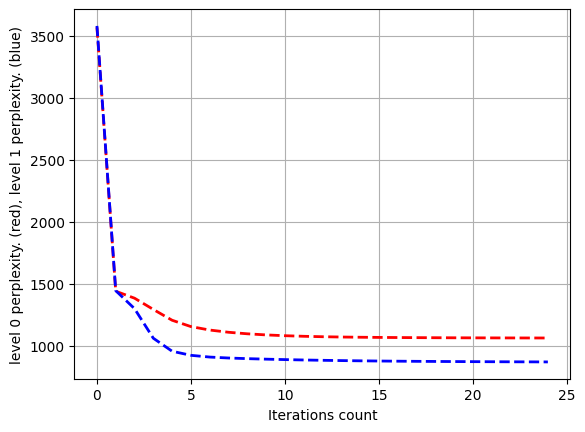

In [ ]:
print_measures(level0, level1, 0, 1)

In [ ]:
# добавляем второй уровень
level2 = hier.add_level(num_topics=20, topic_names=[f'child_child_topic_{i}' for i in range(20)],
                        parent_level_weight=1)
level2.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=10))

# разреженность \phi (матрица слова-темы)
level2.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
# разреженность \theta (матрица темы-документы)
level2.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
# контрастность тем (threshold - вероятность слова в теме)
level2.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3))
# перплексия
level2.scores.add(artm.PerplexityScore(name='PerplexityScore'))

level2.initialize(dictionary=dictionary)
level2.fit_offline(batch_vect, num_collection_passes=25)

Разреженность слова-темы:
0.2552226483821869 (lvl 1) VS (lvl 2) 0.3884826898574829
Разреженность темы-документы:
0.005756578873842955 (lvl 1) VS (lvl 2) 0.01143972110003233
Контрастность тем:
0.5663021802902222 (lvl 1) VS (lvl 2) 0.5431098341941833
Чистота темы:
0.4658373296260834 (lvl 1) VS (lvl 2) 0.3346558213233948
Перплексия:
871.8215942382812 (lvl 1) VS (lvl 2) 695.189453125


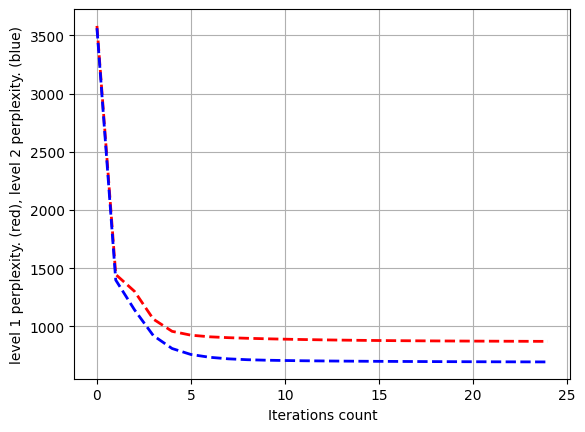

In [ ]:
print_measures(level1, level2, 1, 2)

In [ ]:
# p(subtopic|topic)
psi1 = level1.get_psi()
psi2 = level2.get_psi()
psi1

,topic_0,topic_1,topic_2,topic_3,topic_4
child_topic_0,0.075813,0.002931,0.001637,0.027464,0.066009
child_topic_1,0.013753,0.001086,0.012175,0.066357,0.040652
child_topic_2,0.000126,0.001134,0.536067,0.000280,0.000263
child_topic_3,0.000274,0.603410,0.001429,0.002612,0.000242
child_topic_4,0.001235,0.000718,0.000251,0.804359,0.000310
child_topic_5,0.016439,0.000095,0.000358,0.000231,0.872291
child_topic_6,0.002699,0.000055,0.000444,0.095981,0.001544
child_topic_7,0.003096,0.386758,0.004570,0.000174,0.000140
child_topic_8,0.001897,0.001890,0.440718,0.000428,0.002265
child_topic_9,0.884670,0.001923,0.002352,0.002113,0.016282


In [ ]:
def parent_to_child(parent_level, child_level, threshold: float) -> dict:
  psi = child_level.get_psi()
  children = {}
  for t, topic_name_parent in enumerate(parent_level.topic_names):
    for s, topic_name_child in enumerate(child_level.topic_names):
      if psi.values[s, t] > threshold:
        if topic_name_parent not in children:
          children[topic_name_parent] = [topic_name_child]
        else:
          children[topic_name_parent].append(topic_name_child)
  return children

children0 = parent_to_child(level0, level1, 0.05)
children1 = parent_to_child(level1, level2, 0.05)

theta_level0 = level0.get_theta()
theta_level1 = level1.get_theta()
theta_level2 = level2.get_theta()

In [ ]:
probis = pd.DataFrame(columns=["post", "level_0", "level_1", "level_2", "level_3", "probability"])

for document_id in range(len(texts)):

    # Вероятности принадлежности документа к темам на уровне 0
    probabilities_level0 = theta_level0.iloc[:, document_id]
    topic_id_level0 = probabilities_level0.idxmax()
    children_topics_level1 = children0.get(topic_id_level0, [])

    if children_topics_level1:
        # Вероятности принадлежности документа к темам на уровне 1
        probabilities_level1 = theta_level1.loc[children_topics_level1, document_id]
        topic_id_level1 = probabilities_level1.idxmax()
        children_topics_level2 = children1.get(topic_id_level1, [])

        if children_topics_level2:
            # Вероятности принадлежности документа к темам на уровне 2
            probabilities_level2 = theta_level2.loc[children_topics_level2, document_id]
            topic_id_level2 = probabilities_level2.idxmax()
            probability_level2 = probabilities_level2.max()

            probis.loc[document_id] = [f"{texts[document_id]}", topic_id_level0, topic_id_level1, topic_id_level2, probability_level2]


In [ ]:
probis_sorted = probis.sort_values(by="probability", ascending=False)
probis_sorted.head(10)

,post,level_0,level_1,level_2,level_3,probability
294,"Фильм - ""Кубанские казаки"" (Мосфильм, 1949)",topic_3,child_topic_4,child_child_topic_15,child_child_child_topic_1,1.000000
1302,разбор новогодних фильмов)))),topic_4,child_topic_0,child_child_topic_15,child_child_child_topic_1,1.000000
565,6 июня 1799 г. - день рождения АСа Пушкина. Ща...,topic_3,child_topic_6,child_child_topic_3,child_child_child_topic_13,0.999995
787,14 символов в 9:05=>14 сегодня 88\n6 июня 1799...,topic_3,child_topic_6,child_child_topic_3,child_child_child_topic_13,0.999994
1834,6 июня 1799 г. - день рождения АСа Пушкина. Ща...,topic_3,child_topic_6,child_child_topic_3,child_child_child_topic_13,0.999994
673,2840=>14 в 2:24=>8 46%4G=>14 я 26.02.2024\nСБР...,topic_3,child_topic_6,child_child_topic_3,child_child_child_topic_13,0.999994
567,В 17:17=>88 66%4G=>88 14 символов от\n6 июня 1...,topic_3,child_topic_6,child_child_topic_3,child_child_child_topic_13,0.999994
989,Шел казак куда-то вдаль.\nНа груди была медаль...,topic_3,child_topic_1,child_child_topic_11,child_child_child_topic_36,0.999988
347,Шел казак куда-то вдаль.\nНа груди была медаль...,topic_3,child_topic_1,child_child_topic_11,child_child_child_topic_36,0.999988
2232,Как тут не вспомнить!: Шёл казак куда-то вдаль...,topic_3,child_topic_1,child_child_topic_11,child_child_child_topic_36,0.999988


In [ ]:
for message in (probis_sorted[probis_sorted.level_2 == 'child_child_topic_15'].head(20))["post"].to_list():
  print(message[:150])
  print("----")

Фильм - "Кубанские казаки" (Мосфильм, 1949)
----
разбор новогодних фильмов))))
----
Первый Блиц в Шляпе 06.03.2024
----
ОБЖ-2 серия 27 "Тайный поклонник"
----
Степан Писахов (читает Борис Шергин)
Степан Писахов - Хваленки
Северные сказки. часть 1
С. Г. Писахов
Писахов Степан
Мороженны песни
Кислы шти
Как поп
----
#ЛЧ_календарь
✨25 октября родился Степан Писахов — русский художник, писатель, этнограф, сказочник, преподаватель живописи.
Степан Писахов бессмертен.
----
Клуб «Белый попугай» — юмористическая телепередача. В разное время ведущими передачи являлись Аркадий Арканов, Григорий Горин, Эльдар Рязанов, Юрий Ни
----
🍺Харли от пивоварни HopHead — взрывная смесь хмелей Citra, El Dorado и Idaho.
Среди 19 человек верно ответивших на загадку, удача повернулась лицом к 
----
Презентация альманаха современных комиксов «"Бам!Бук". Оранжевая Книга» 16+
----
Who'll Stop The Rain
Travelin' Band
Run Through The Jungle
Ramble Tamble
Proud Mary
Lookin' Out My Back Door
Green River
Fortunate Son
C

Проведем анализ всех полученных тем, и их дочерних подтем. Для каждой выберем название для визуализации результата. Получим иерархическое древо с темами

In [ ]:
level0_names = {
    'topic_0': 'Семейные отношения',
    'topic_1': 'Регулирование производства и продажи алкогольной продукции',
    'topic_2': 'Обзор и разнообразие сортов пива',
    'topic_3': 'Русская литература',
    'topic_4': 'Ностальгия и воспоминания'
}

level1_names = {
    'child_topic_0': 'Развлечения',
    'child_topic_1': 'Путешествия',
    'child_topic_2': 'Пивоварение и разнообразие сортов пива',
    'child_topic_3': 'Алкогольная индустрия и законодательство',
    'child_topic_4': 'Деградация современного общества',
    'child_topic_5': 'Ностальгия и былое время',
    'child_topic_6': 'Культурные и исторические праздники',
    'child_topic_7': 'Урбанистические мифы и заблуждения о здоровом образе жизни',
    'child_topic_8': 'Пивоварение',
    'child_topic_9': 'Личностный рост и самосовершенствование'
}


level2_names = {
    'child_child_topic_0': 'Пиво: культура, исследования и вечеринки',
    'child_child_topic_1': 'На пересечении искусств',
    'child_child_topic_2': 'Размышления о жизни',
    'child_child_topic_3': 'Пиво',
    'child_child_topic_4': 'Пивоварение: история, стили, технологии',
    'child_child_topic_5': 'Жизненные изменения и вызовы',
    'child_child_topic_6': 'Праздники и культурные традиции',
    'child_child_topic_7': 'Ресторанная критика',
    'child_child_topic_8': 'Регулирование производства и цен на алкогольную продукцию',
    'child_child_topic_9': 'Деградация психологического состояния и влияние искусственных методов на личность',
    'child_child_topic_10': 'Развлечения и культура',
    'child_child_topic_11': 'Разнообразие культурных мероприятий',
    'child_child_topic_12': 'Воздействие на здоровье: питание, алкоголь, добавки',
    'child_child_topic_13': 'Новые сорта и вкусы крафтового пива',
    'child_child_topic_14': 'Инвестиции и экономика Советского Союза',
    'child_child_topic_15': 'Искусство & Культура',
    'child_child_topic_16': 'Проблемы и скандалы в индустрии пива',
    'child_child_topic_17': 'Жизненные истории',
    'child_child_topic_18': 'Личностное развитие',
    'child_child_topic_19': 'Ностальгия за советским временем'
}

dependencies = {}

for parent, children in children0.items():
    parent_name = level0_names[parent]
    dependencies[parent_name] = []
    for child in children:
        child_name = level1_names[child]
        child_name = child_name.replace(':', ';')
        dependencies[parent_name].append(child_name)

for child, grandchildren in children1.items():
    child_name = level1_names[child]
    dependencies[child_name] = []
    for grandchild in grandchildren:
        grandchild_name = level2_names[grandchild]
        grandchild_name = grandchild_name.replace(':', ';')
        dependencies[child_name].append(grandchild_name)

print(dependencies)

{'Семейные отношения': ['Развлечения', 'Личностный рост и самосовершенствование'], 'Регулирование производства и продажи алкогольной продукции': ['Алкогольная индустрия и законодательство', 'Урбанистические мифы и заблуждения о здоровом образе жизни'], 'Обзор и разнообразие сортов пива': ['Пивоварение и разнообразие сортов пива', 'Пивоварение'], 'Русская литература': ['Путешествия', 'Деградация современного общества', 'Культурные и исторические праздники'], 'Ностальгия и воспоминания': ['Развлечения', 'Ностальгия и былое время'], 'Развлечения': ['Жизненные изменения и вызовы', 'Искусство & Культура'], 'Путешествия': ['Разнообразие культурных мероприятий'], 'Пивоварение и разнообразие сортов пива': ['Пивоварение; история, стили, технологии', 'Новые сорта и вкусы крафтового пива'], 'Алкогольная индустрия и законодательство': ['Регулирование производства и цен на алкогольную продукцию', 'Инвестиции и экономика Советского Союза', 'Проблемы и скандалы в индустрии пива'], 'Деградация совреме

In [ ]:
import graphviz

dot = graphviz.Digraph()
for parent, children in dependencies.items():
    dot.node(parent, shape='box')
    for child in children:
        dot.node(child, shape='box')
        dot.edge(parent, child)

dot.render('dependency_tree', format='png', cleanup=True)

'dependency_tree.png'

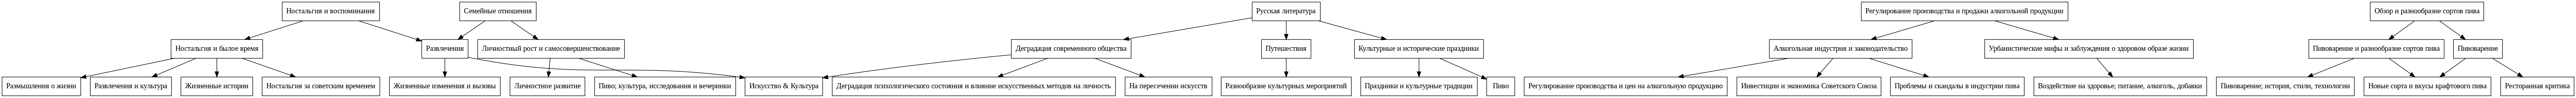

In [ ]:
from IPython.display import Image
Image("dependency_tree.png")